In [1]:
import matplotlib.pylab as plt

def get_acc(filename):
    file = open(filename, 'r')
    lines = file.readlines()
    
    best_acc = []
    for line in lines:
        if "Train Epoch" in line:
            best_acc.append(float(line.split("Best Accuracy:")[-1].split('%')[0]))
    #acc.append(best_acc)
    
    return best_acc

def plot_dict(data, title):
    plt.figure(figsize=(8,8))
    
    for key in data:
        if key == 'lt':
            plt.plot(data[key], label=key,c='black')
        elif 'g_kl' in key:
            plt.plot(data[key], label=key,ls='dotted')
        else:
            plt.plot(data[key], label=key,ls='-.')
    
    plt.legend()
    plt.title(title)
    plt.xlabel("Pruning Iter")
    plt.ylabel("Acc")
    #plt.savefig(title+".png")
    plt.show()
    
    return

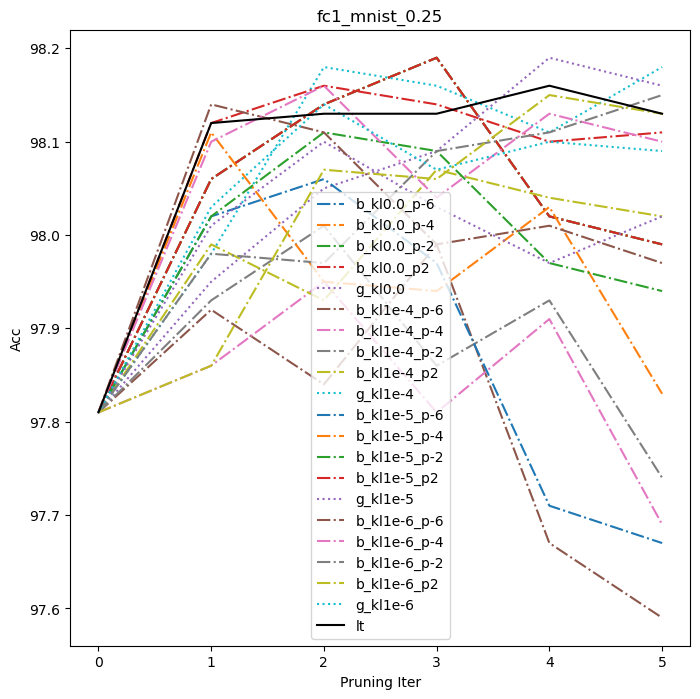

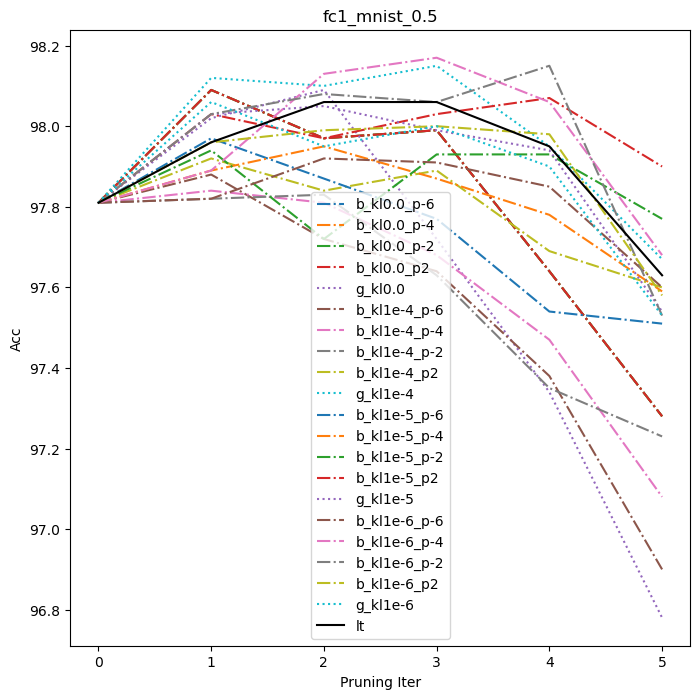

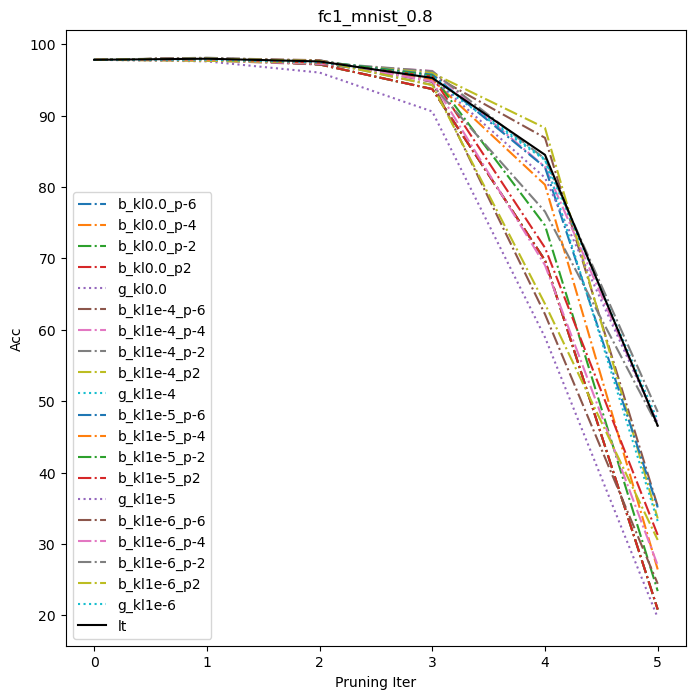

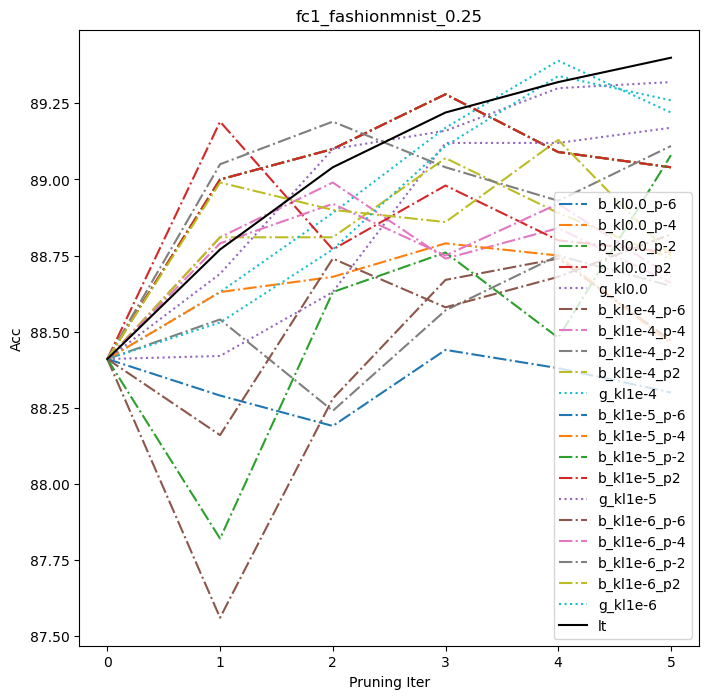

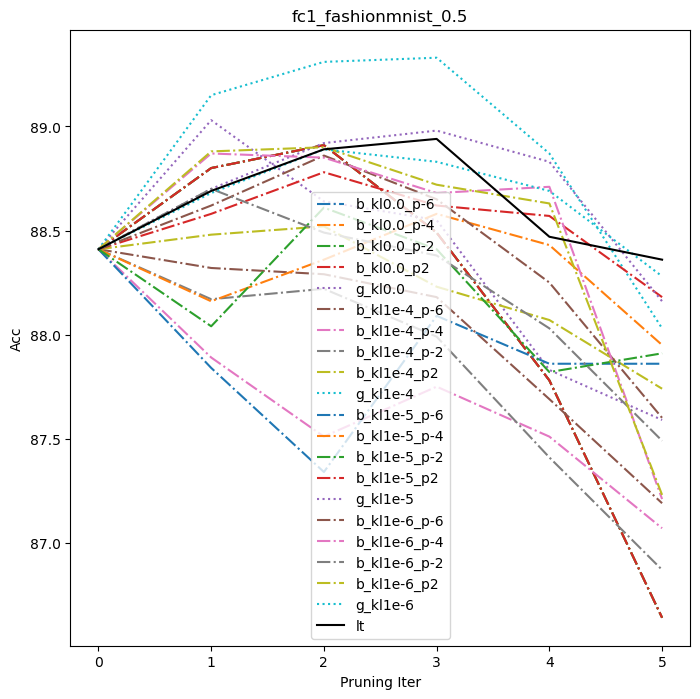

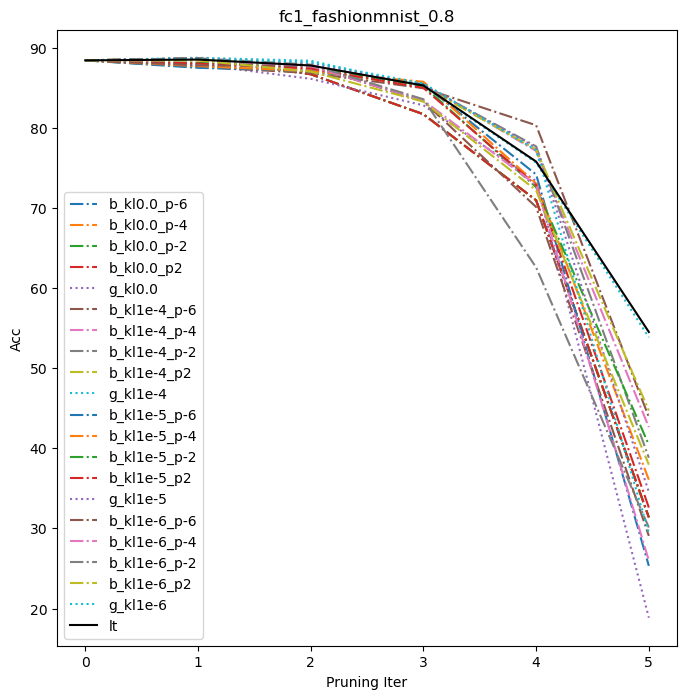

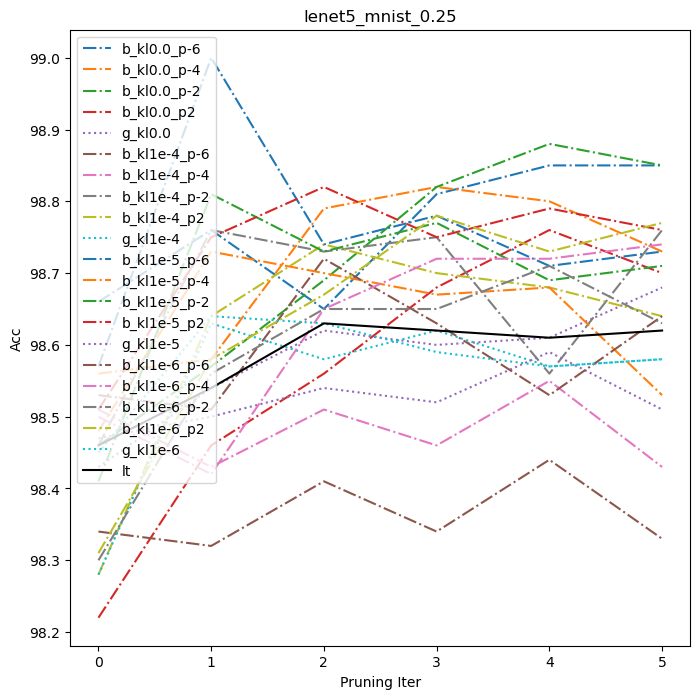

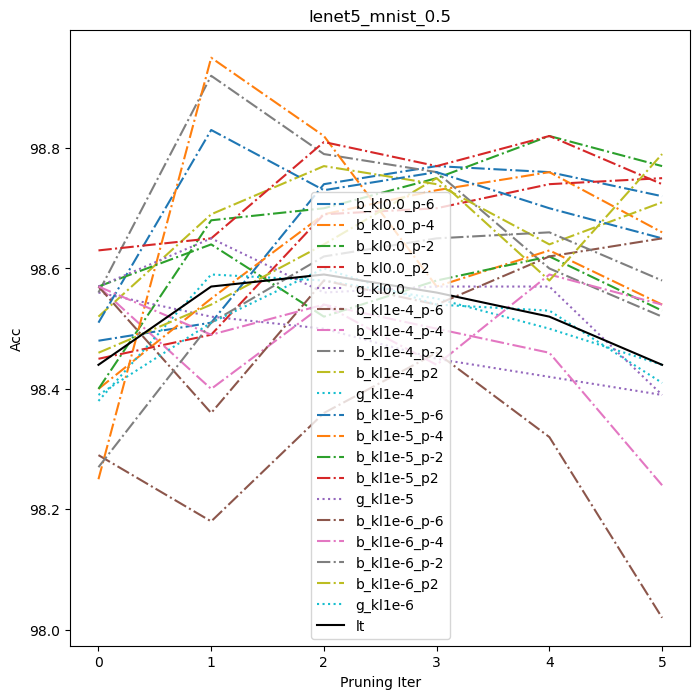

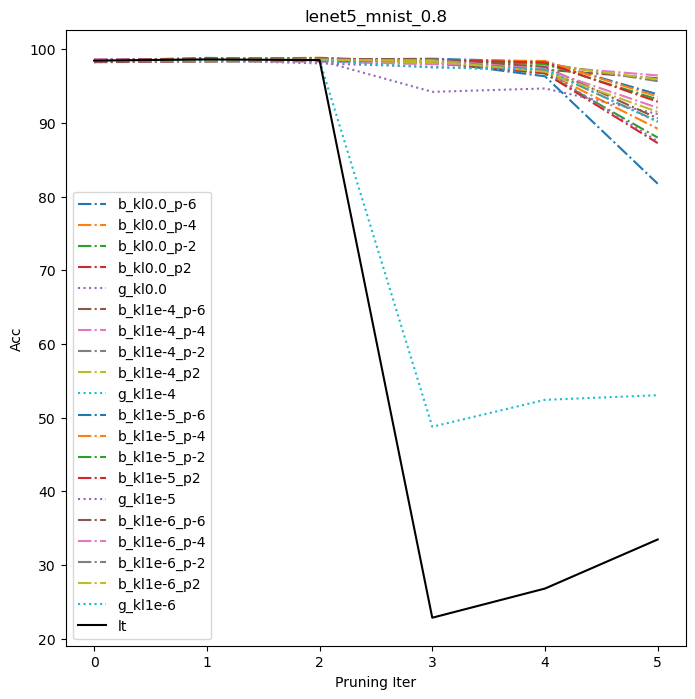

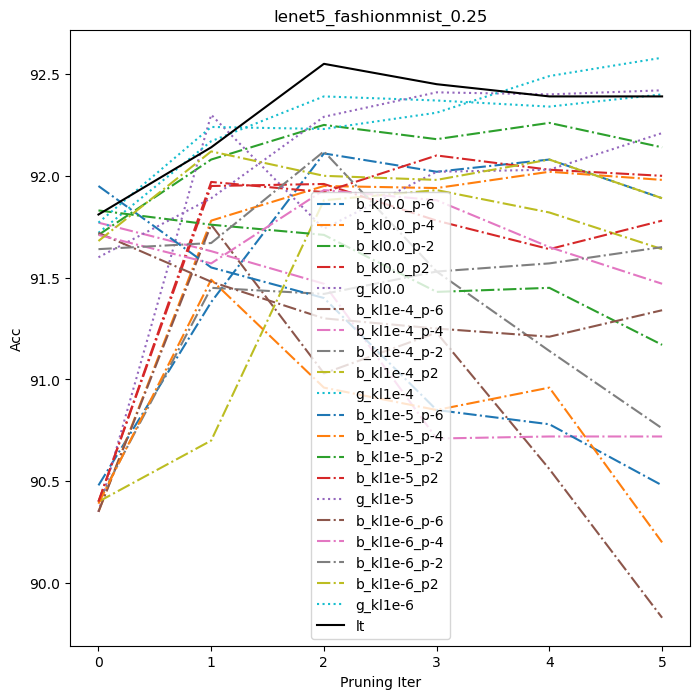

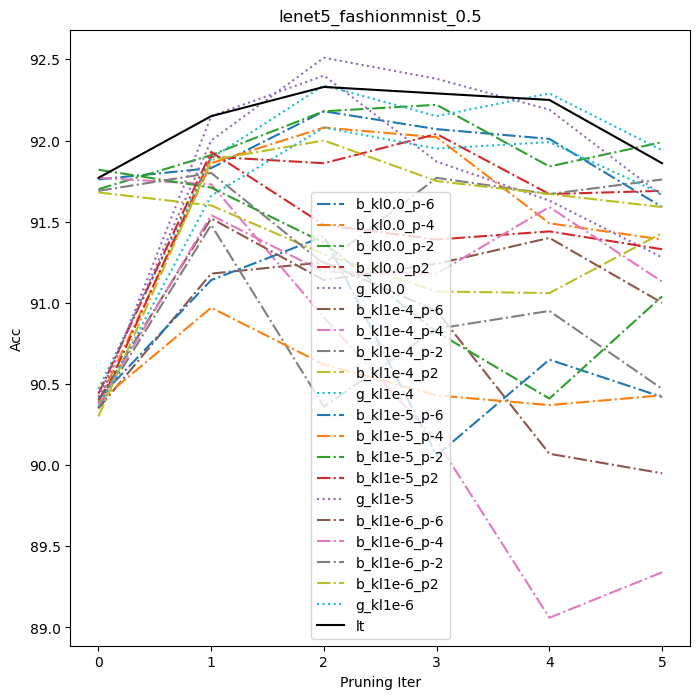

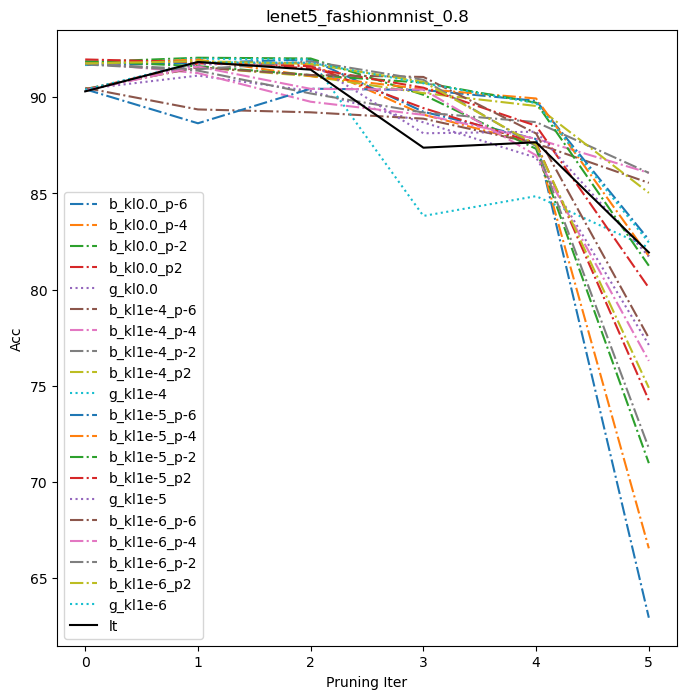

In [2]:
datasets = ['mnist', 'fashionmnist']
model = ['fc1', 'lenet5']
prune_rate = [0.25, 0.5, 0.8]
kls = ["0.0", "1e-4", "1e-5", "1e-6"]
priors = [-6, -4, -2, 2]
root = 'logs/'

acc = []
for arch_type in model:
    
    for dataset in datasets:
        
        for percent in prune_rate:
            
            KL_prune = {}
            for kl in kls:
                for prior in priors:
                    file = (root+"bernoulli_kl{"+kl+
                            "}_data{"+dataset+
                            "}_arch{"+arch_type+
                            "}_prior{"+str(prior)+
                            "}_percent{"+str(percent)+"}.out")
                    KL_prune["b_kl"+kl+'_p'+str(prior)] = get_acc(file)
                
                file = (root+"gaussian_kl{"+kl+
                            "}_data{"+dataset+
                            "}_arch{"+arch_type+
                            "}_percent{"+str(percent)+"}.out")
                KL_prune["g_kl"+kl] = get_acc(file)
            
            file = (root+"lt_data{"+dataset+
                            "}_arch{"+arch_type+
                            "}_percent{"+str(percent)+"}.out")
            KL_prune["lt"] = get_acc(file)
            #print(len(KL_prune))       
            plot_dict(KL_prune, arch_type+'_'+dataset+'_'+str(percent))
                    
# for i in range(1, 19):
#     file = open(str(i)+'.out', 'r')
#     lines = file.readlines()
    
#     best_acc = []
#     for line in lines:
#         if "Train Epoch" in line:
#             best_acc.append(float(line.split("Best Accuracy:")[-1].split('%')[0]))
#     acc.append(best_acc)
    
#     if (i-1) % 9 == 0:
#         f, axarr = plt.subplots(1, 3, sharex=True)
#         f.set_figheight(3)
#         f.set_figwidth(10)
        
#     if i % 3 == 0:
#         for j, prune in enumerate(prune_types):
#             axarr[((i-1)//3)%3 ].plot(acc[j], label=prune)
            
#         axarr[((i-1)//3)%3 ].legend()
#         axarr[((i-1)//3)%3 ].set_title(dataset[ ((i-1)//3) % 3 ] +' '+ model[((i-1)//9) % 2])
#         axarr[((i-1)//3)%3 ].set_ylabel("Acc")
#         axarr[((i-1)//3)%3 ].set_xlabel("Prune times (50% parameters per pruning)")
        
#         acc = []
#         plt.tight_layout()
#     file.close()